# 데이터 시각화(visualization)
- 데이터의 변수의 수, 종류, 분석 목적에 따라 시각화 도구가 달라짐

<img src='./image/4_00001.png' width='70%'>


출처: https://www.qlik.com/blog/third-pillar-of-mapping-data-to-visualizations-usage

<img src='./image/4_00002.png' width='40%' align='left'>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 도수분포표란?
- 분할된 구간과 데이터의 개수를 표로 정리한 것

In [39]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [40]:
# 50명의 영어 점수 array
eng = df['english']

# describe를 표시
eng.describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64

In [41]:
freq,_ = np.histogram(eng, bins=10, range=(0,100) ) # bins = 막대의 개수(구간), range = 0점 ~ 100점 사이
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [42]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class= [f'{i}~{i+10}' for i in range(0,100,10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({"frequency":freq},
                           index = pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


### 계급값
- 각 계급을 대표하는 값으로 계급의 중앙값이 이용
- 60~70의 계급이면 계급값은 65점

In [43]:
class_value = [(i + (i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

### 상대도수
- 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타냄

In [44]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

### 누적 상대도수
- 해당 계급까지의 상대도수의 합
- 누적합 : np.cumsum()

In [45]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [46]:
# 도수 분포표 확장
freq_dist_df['class value'] = class_value
freq_dist_df['relative freq'] = rel_freq # 상대도수
freq_dist_df['cum. relative freq'] = cum_rel_freq # 누적 상대도수
freq_dist_df

,frequency,class value,relative freq,cum. relative freq
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


### 도수분포표의 최빈값
- 최대가 되는 계급의 계급값 => 60~70인 계급의 도수가 최대

**판다스 데이터프레임의 idxmax(), idxmin() 함수**
- pandas.DataFrame.idxmax(axis=0, skipna=True):
    - 지정된 축을 따라 최대값의 인덱스를 포함하는 Series 반환
- 인수들
    - axis : 정수 또는 문자열 유형 매개 변수로 사용할 축 지정
        - row-wise : 0 또는 index, column-wise: 1 또는 columns
    - skipna : 부울 매개 변수
        - 널 값 제외를 지정
        - 전체 행 또는 열이 널이면 결과는 NA가 됨
- 반환 값 : 지정된 축을 따라 최대 값의 인덱스를 포함하는 Series를 반환

In [19]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
dataframe

,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [20]:
series = dataframe.idxmax()
series

Attendance        1
Obtained Marks    0
dtype: int64

In [21]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

**도수 분포표 최빈 값**
- 빈도가 높은 계급이 계급값 반환

In [25]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

**백분위수 및 사분위수 계산**

In [26]:
x = np.arange(1, 12, 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
np.percentile(x, 10) # 백분위수 (0~100사이 값으로 입력)
np.quantile(x, 0.1) # 사분위수 (0~1 사이 값으로 입력)

2.0

2.0

In [29]:
np.percentile(x, 25) # 25% 
np.quantile(x, 0.25) # 하사분위수, Q1

3.5

3.5

### 히스토그램

In [30]:
import matplotlib.pyplot as plt

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
         7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

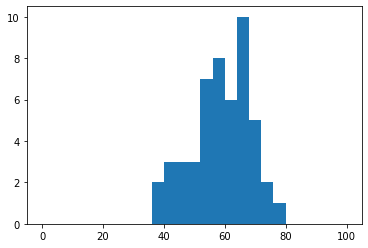

In [36]:
plt.hist(eng, bins=25, range=(0,100))
plt.show()

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  4.,  6., 14., 15.,  7.,  2.,  0.,
         0.,  0.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 <BarContainer object of 15 artists>)

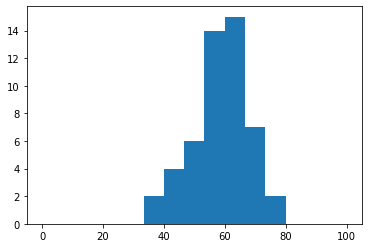

In [37]:
plt.hist(eng, bins=15, range=(0,100))
plt.show()

### 상자그림
**< 확인 가능한 데이터 >**
1. 분포 모양 : 왜도 (비대칭/대칭)
2. 이상치

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe801a23910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe801a23f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe801a234c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe801a326d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe801a32a60>],
 'means': []}

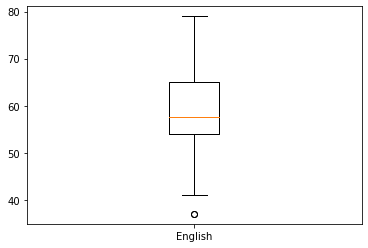

In [38]:
plt.boxplot(eng, labels=['English'])
plt.show()